<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考:https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb](https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb)

In [1]:
#@title 事前準備
!pip -q install ultralytics
!pip -q install ttach
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

plt.rcParams["figure.figsize"] = [3.0, 3.0]

!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

%cd /content/YOLO-V11-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultra

In [2]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
#uploaded = files.upload()
#file_name = list(uploaded.keys())[0]
file_name ="objNG.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

#オブジェクト検出

In [3]:
import glob
import os

model = YOLO('/content/last-model.pt')
model = model.cpu()

os.makedirs('/content/combi', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image.save("/content/combi/"+os.path.basename(filename))


0: 640x640 1 OK, 1 NG, 3442.0ms
Speed: 9.7ms preprocess, 3442.0ms inference, 26.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 3321.4ms
Speed: 4.3ms preprocess, 3321.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 3993.5ms
Speed: 4.1ms preprocess, 3993.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2 NGs, 4422.6ms
Speed: 4.2ms preprocess, 4422.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 3208.8ms
Speed: 3.2ms preprocess, 3208.8ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2 NGs, 3202.1ms
Speed: 3.5ms preprocess, 3202.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 OKs, 4304.9ms
Speed: 3.7ms preprocess, 4304.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 1 NG, 3168.8ms
Speed: 3.0ms preprocess, 3168.8ms inference, 0.9ms postprocess 

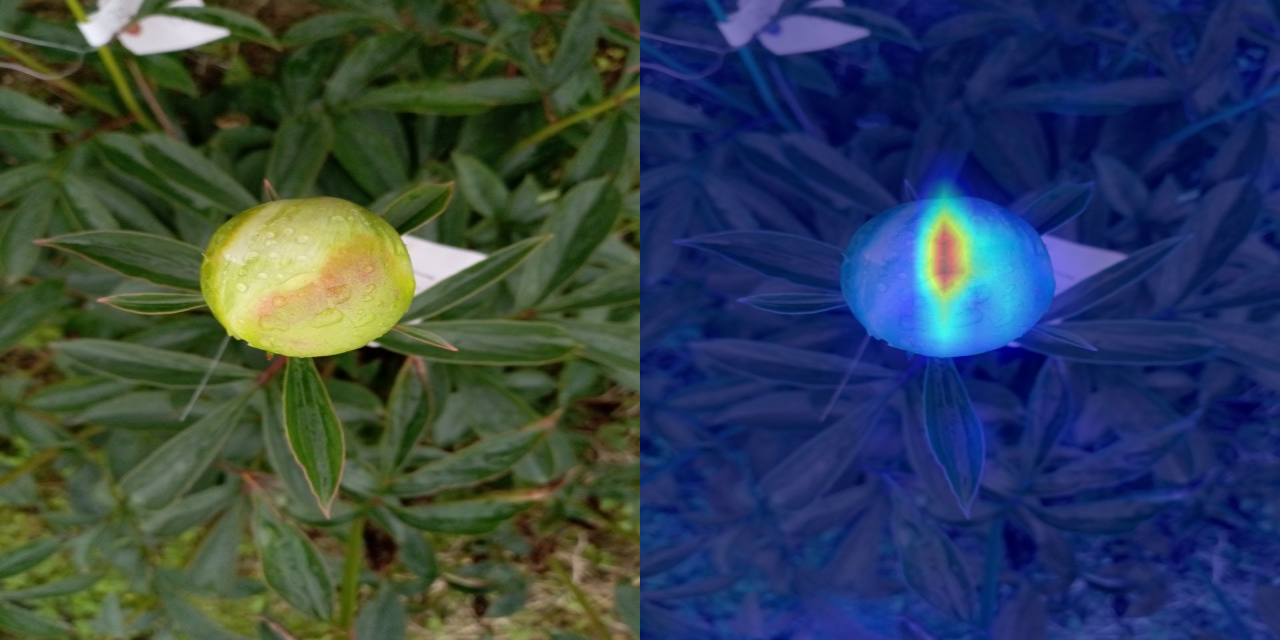

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

In [4]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi', 'zip', '/content/combi')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi.zip'

##判定結果と合わせて表示する

In [6]:
#判定結果を取得
from ultralytics import YOLO
model = YOLO("/content/last-model.pt")
results = model(source="/content/original/", save=True, save_conf=True)


image 1/96 /content/original/002 (2).jpg: 480x640 1 OK, 1 NG, 70.6ms
image 2/96 /content/original/002 (3).jpg: 640x480 2 OKs, 72.1ms
image 3/96 /content/original/002 (4).jpg: 640x480 1 NG, 41.6ms
image 4/96 /content/original/002 (5).jpg: 640x480 1 OK, 41.5ms
image 5/96 /content/original/002 (6).jpg: 640x480 1 NG, 38.6ms
image 6/96 /content/original/006 (4).jpg: 640x480 1 NG, 38.0ms
image 7/96 /content/original/006 (5).jpg: 640x480 2 OKs, 1 NG, 39.1ms
image 8/96 /content/original/006 (6).jpg: 640x480 1 OK, 1 NG, 37.5ms
image 9/96 /content/original/006 (7).jpg: 640x480 1 OK, 39.1ms
image 10/96 /content/original/007 (6).jpg: 640x480 1 OK, 1 NG, 38.4ms
image 11/96 /content/original/007 (7).jpg: 640x480 1 OK, 39.1ms
image 12/96 /content/original/011 (3).jpg: 640x480 1 OK, 1 NG, 38.6ms
image 13/96 /content/original/011 (4).jpg: 640x480 1 OK, 1 NG, 38.8ms
image 14/96 /content/original/011 (5).jpg: 640x480 1 NG, 38.0ms
image 15/96 /content/original/011 (6).jpg: 640x480 2 NGs, 37.2ms
image 16/

In [12]:
#判定済みと結合
import glob
import os

model = YOLO('/content/last-model.pt')
model = model.cpu()

os.makedirs('/content/combi2', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/detect/predict2/'+os.path.basename(filename))
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2/"+os.path.basename(filename))


0: 640x640 1 OK, 1 NG, 3737.0ms
Speed: 3.4ms preprocess, 3737.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 4117.2ms
Speed: 3.7ms preprocess, 4117.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 3335.7ms
Speed: 2.8ms preprocess, 3335.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2 NGs, 4102.7ms
Speed: 4.2ms preprocess, 4102.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 3428.6ms
Speed: 4.2ms preprocess, 3428.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2 NGs, 3137.7ms
Speed: 5.3ms preprocess, 3137.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 OKs, 3831.9ms
Speed: 3.2ms preprocess, 3831.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 1 NG, 3242.4ms
Speed: 3.1ms preprocess, 3242.4ms inference, 1.0ms postprocess p

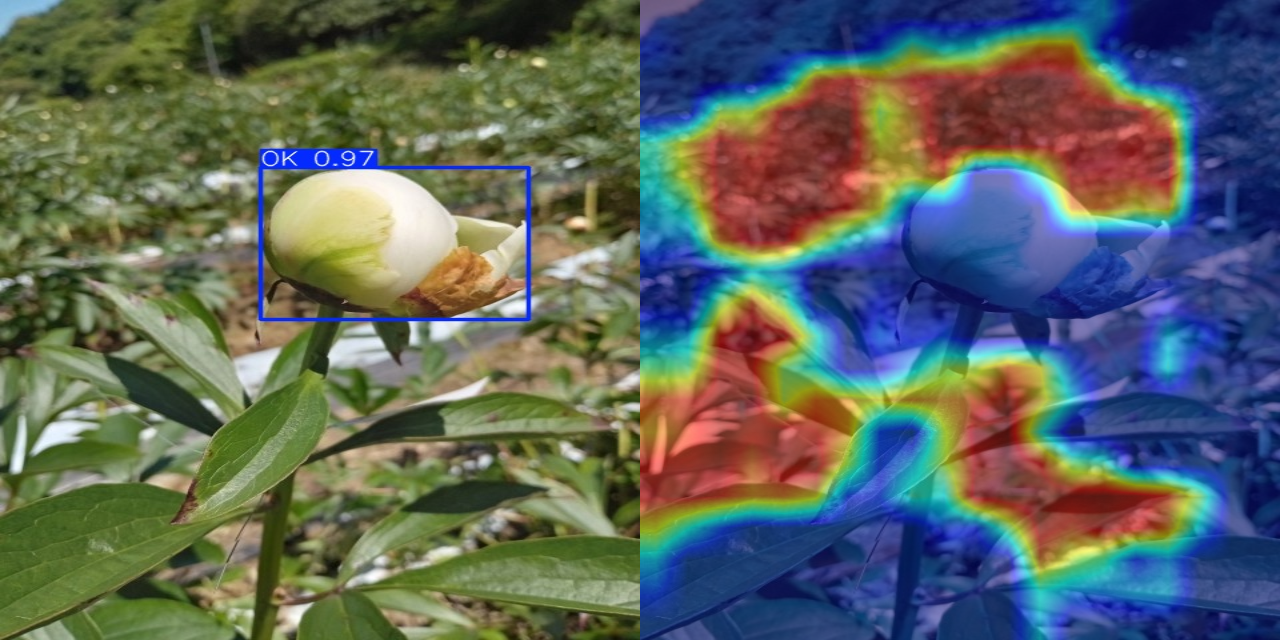

In [13]:
im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [14]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2', 'zip', '/content/combi2')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi2.zip'

#クラス分け

In [ ]:
img = cv2.imread('/content/NG/019 (2).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255


0: 640x640 OK 0.68, NG 0.32, 225.5ms
Speed: 55.5ms preprocess, 225.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


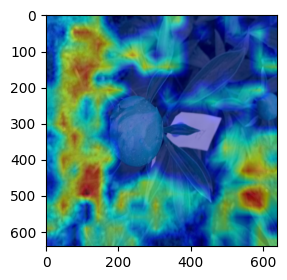

In [ ]:
model = YOLO('/content/11n.pt')
model = model.cpu()
target_layers =[model.model.model[-2]]
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 OK 0.68, NG 0.32, 57.2ms
Speed: 10.8ms preprocess, 57.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


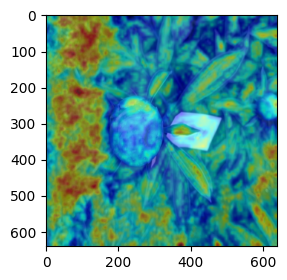

In [ ]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4],model.model.model[-5], model.model.model[-6], model.model.model[-7]]
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

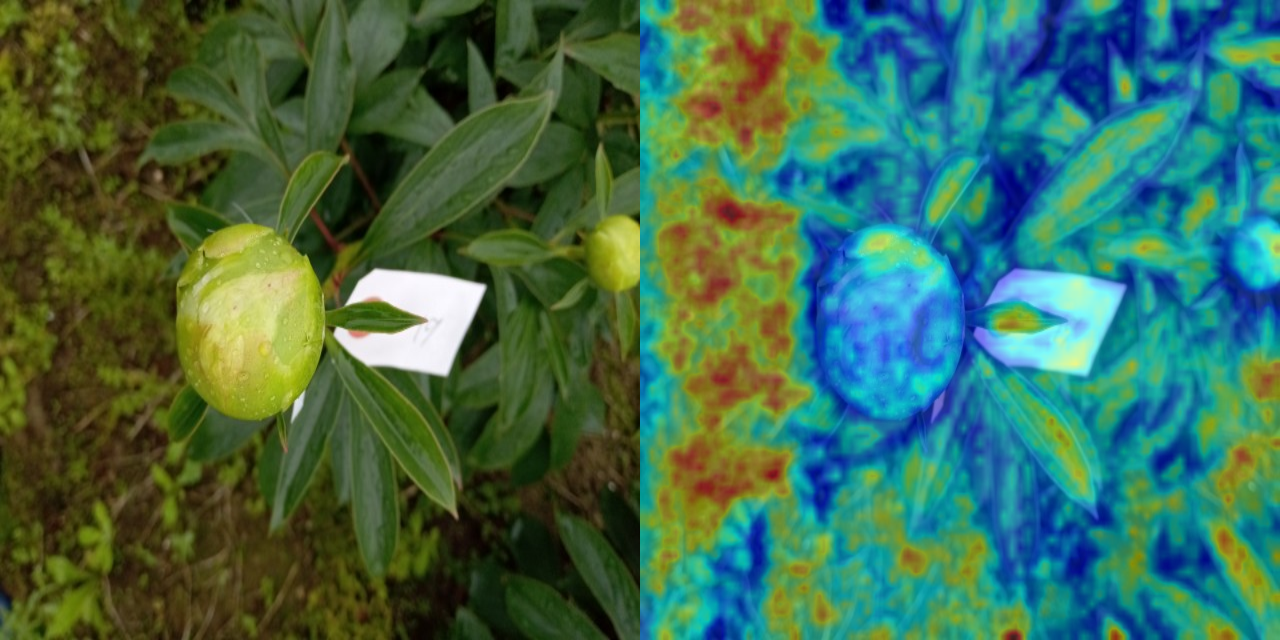

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))